In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Fit-a-polynomial-of-degree-m-to-your-training-data,-letting-$m-=-1,-2,-...$.-A-polynomial-of-degree-$m$-has-the-form-$$-p(x,-\textbf{w})-=-w_0-+-w_1x-+-w_2x^2-+-...-+-w_mx^m-$$Fit-by-minimizing-the-mean-squared-error-$E(W)$-via-differentiating-with-respect-to-$\textbf{w}$-and-solving-the-resulting-linear-equation;-this-will-give-the-optimal-weight-vector,-$w^*-$,-with-minimal-error-$-E(w^*)$." data-toc-modified-id="Fit-a-polynomial-of-degree-m-to-your-training-data,-letting-$m-=-1,-2,-...$.-A-polynomial-of-degree-$m$-has-the-form-$$-p(x,-\textbf{w})-=-w_0-+-w_1x-+-w_2x^2-+-...-+-w_mx^m-$$Fit-by-minimizing-the-mean-squared-error-$E(W)$-via-differentiating-with-respect-to-$\textbf{w}$-and-solving-the-resulting-linear-equation;-this-will-give-the-optimal-weight-vector,-$w^*-$,-with-minimal-error-$-E(w^*)$.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fit a polynomial of degree m to your training data, letting $m = 1, 2, ...$. A polynomial of degree $m$ has the form<br><br> <div class="MathJax_Display" style="text-align: center;"></div><script type="math/tex; mode=display" id="MathJax-Element-19"> p(x, \textbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_mx^m </script><br>Fit by minimizing the mean squared error $E(W)$ via differentiating with respect to $\textbf{w}$ and solving the resulting linear equation; this will give the optimal weight vector, $w^* $, with minimal error $ E(w^*)$.</a></span></li><li><span><a href="#Create-a-test-set-of-100-data-points-using-same-procedure-used-to-create-training-data.-Using-optimal-weights-for-$m-=-1,-2,-....,$-compute-the-$\text{root-mean-square-error}$-(RMS)-of-your-optimal-polynomial-on-both-the-training-data-and-test-data;-the-RMS-is-defined-by--$$-RMS-=-\sqrt{2/NE(w^*)}-\text{,}-$$-where-$N$-is-the-size-of-the-data-set.-($N$-will-be-different-for-your-training-and-test-sets.)" data-toc-modified-id="Create-a-test-set-of-100-data-points-using-same-procedure-used-to-create-training-data.-Using-optimal-weights-for-$m-=-1,-2,-....,$-compute-the-$\text{root-mean-square-error}$-(RMS)-of-your-optimal-polynomial-on-both-the-training-data-and-test-data;-the-RMS-is-defined-by--$$-RMS-=-\sqrt{2/NE(w^*)}-\text{,}-$$-where-$N$-is-the-size-of-the-data-set.-($N$-will-be-different-for-your-training-and-test-sets.)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create a test set of 100 data points using same procedure used to create training data. Using optimal weights for $m = 1, 2, ....,$ compute the $\text{root-mean-square error}$ (RMS) of your optimal polynomial on both the training data and test data; the RMS is defined by <br><br> <div class="MathJax_Display" style="text-align: center;"></div><script type="math/tex; mode=display" id="MathJax-Element-31"> RMS = \sqrt{2/NE(w^*)} \text{,} </script> where $N$ is the size of the data set. ($N$ will be different for your training and test sets.)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-can-do-this-a-better-way-by-making-a-numpy-predictions-array-and-taking-advantage-of-numpy's-vectorization/broadcasting" data-toc-modified-id="We-can-do-this-a-better-way-by-making-a-numpy-predictions-array-and-taking-advantage-of-numpy's-vectorization/broadcasting-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>We can do this a better way by making a numpy predictions array and taking advantage of numpy's vectorization/broadcasting</a></span></li></ul></li></ul></li><li><span><a href="#Plot-the-RMS-on-training-and-test-as-a-function-of-$m$.-You-should-then-be-able-to-see-the-optimal-value-of-m-for-fitting-your-data;-the-optimal-choice-will-have-a-small-error,-small-$\text{model-complexity}$-(low-degree),-and-decent-$-\text{generalization}-$-(low-test-error)" data-toc-modified-id="Plot-the-RMS-on-training-and-test-as-a-function-of-$m$.-You-should-then-be-able-to-see-the-optimal-value-of-m-for-fitting-your-data;-the-optimal-choice-will-have-a-small-error,-small-$\text{model-complexity}$-(low-degree),-and-decent-$-\text{generalization}-$-(low-test-error)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot the RMS on training and test as a function of $m$. You should then be able to see the optimal value of m for fitting your data; the optimal choice will have a small error, small $\text{model complexity}$ (low degree), and decent $ \text{generalization} $ (low test error)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-expecte-that-the-RMSE-for-the-training-data-will-continually-go-down-because-it-is-getting-closer-and-closer-to-the-actually-data-with-higher-d,-but-with-training-data-we-should-see-RMSE-go-down-then-back-up.-In-case-of-the-true-function-being-a-3-degree-polynomial,-it-takes-a-lot-of-noise-(sample-from-normal-distribution-with-mean-0-and-sd-~-99999)-to-see-this-happen" data-toc-modified-id="We-expecte-that-the-RMSE-for-the-training-data-will-continually-go-down-because-it-is-getting-closer-and-closer-to-the-actually-data-with-higher-d,-but-with-training-data-we-should-see-RMSE-go-down-then-back-up.-In-case-of-the-true-function-being-a-3-degree-polynomial,-it-takes-a-lot-of-noise-(sample-from-normal-distribution-with-mean-0-and-sd-~-99999)-to-see-this-happen-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>We expecte that the RMSE for the training data will continually go down because it is getting closer and closer to the actually data with higher d, but with training data we should see RMSE go down then back up. In case of the true function being a 3 degree polynomial, it takes a lot of noise (sample from normal distribution with mean 0 and sd ~ 99999) to see this happen</a></span></li></ul></li></ul></li><li><span><a href="#Based-on-the-chart,-the-best-tradeoff-b/w-simplicity-and-minimal-error-is-picking-a-3rd-degree-polynomial.-Let's-see-it's-exact-error-and-plot-it-with-the-training-data" data-toc-modified-id="Based-on-the-chart,-the-best-tradeoff-b/w-simplicity-and-minimal-error-is-picking-a-3rd-degree-polynomial.-Let's-see-it's-exact-error-and-plot-it-with-the-training-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Based on the chart, the best tradeoff b/w simplicity and minimal error is picking a 3rd degree polynomial. Let's see it's exact error and plot it with the training data</a></span></li><li><span><a href="#Let's-see-the-RMSE-we-get-for-the-optimal-degree-polynomial-$(m-=-3$)-on-the-test-data-and-plot-the-resulting-polynomial-against-the-actual-data" data-toc-modified-id="Let's-see-the-RMSE-we-get-for-the-optimal-degree-polynomial-$(m-=-3$)-on-the-test-data-and-plot-the-resulting-polynomial-against-the-actual-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Let's see the RMSE we get for the optimal degree polynomial $(m = 3$) on the test data and plot the resulting polynomial against the actual data</a></span></li><li><span><a href="#Regularized-version" data-toc-modified-id="Regularized-version-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Regularized version</a></span><ul class="toc-item"><li><span><a href="#Training-set" data-toc-modified-id="Training-set-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Training set</a></span><ul class="toc-item"><li><span><a href="#RMSEs-for-training-set" data-toc-modified-id="RMSEs-for-training-set-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>RMSEs for training set</a></span></li></ul></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Test set</a></span><ul class="toc-item"><li><span><a href="#RMSEs-for-test-set" data-toc-modified-id="RMSEs-for-test-set-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>RMSEs for test set</a></span></li></ul></li></ul></li></ul></div>

In [2]:
# Good resource: https://neutrium.net/mathematics/least-squares-fitting-of-a-polynomial/

# Fit a polynomial of degree m to your training data, letting $m = 1, 2, ...$. A polynomial of degree $m$ has the form<br><br> $$ p(x, \textbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_mx^m $$<br>Fit by minimizing the mean squared error $E(W)$ via differentiating with respect to $\textbf{w}$ and solving the resulting linear equation; this will give the optimal weight vector, $w^* $, with minimal error $ E(w^*)$.


   3     2
3 x + 5 x + 100 x + 9


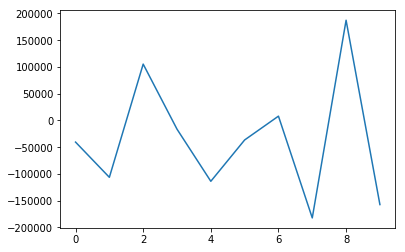

In [44]:
def gen_data_set(size, mu, sigma):
    noise = np.random.normal(loc=mu, scale=sigma, size=size)
    x = .6*np.linspace(1, size, num=size)
    p = np.poly1d([3, 5, 100, 9])
    print(np.poly1d(p))
    y_without_noise = [p(x_i) for x_i in x]
    y = y_without_noise + noise
    plt.plot(y)
    plt.show()
    return [x, y]

mu, sigma = 0, 99999
x_train, y_train = gen_data_set(size=10, mu=mu, sigma=sigma)

Given $N$ = # data of points and $m$ = maximal degree of the fitted polynomial, the linear system for the unregularized version: $A\textbf{w} = \textbf{y}$, where <br><br>$ 
A = \begin{bmatrix}
    N & \sum_{i=1}^{N} x_i & \dots & \sum_{i=1}^{N} x_i^m \\
    \sum_{i=1}^{N} x_i & \sum_{i=1}^{N} x_i^2 & \dots & \sum_{i=1}^{N} x_i^{m+1} \\ 
    \vdots & \vdots & \vdots & \vdots \\
    \sum_{i=1}^{N} x_i^m & \sum_{i=1}^{N} x_i^{m+1} & \dots & \sum_{i=1}^{N} x_i^{2m} \\
\end{bmatrix} 
\text{, }
\textbf{w} = \begin{bmatrix}
    w_0 \\
    w_1 \\ 
    \vdots \\
    w_m 
\end{bmatrix}
\text{, and }
\textbf{y} = \begin{bmatrix}
    \sum_{i=1}^{N} y_i \\
    \sum_{i=1}^{N} x_iy_i \\ 
    \vdots \\
    \sum_{i=1}^{N} x_i^my_i 
\end{bmatrix}
$
<br>
<br>



and the linear system for the regularized version: $$(A + \lambda I)\textbf{w} = \textbf{y}\text{, where }\lambda\text{ is the regularization constant}$$

In [45]:
# Builds and solves nonnormalized system
def get_weights(x_train, y_train, m, lamb=-1):
    n = len(x_train)
    if len(y_train) != n:
        print('Need same amt of y values as data points')
        return;
    
    if m == 0:
        return []
    
    m = n-1 if m >= n else m
        
    left_matrix = []
    right_matrix = []
    
    extra = 0
    for r in range(0, m): # Builds matrix
        left_row = []

        for c in range(0+extra, m+extra): # Builds a row 
            left_value = 0

            for i in range(n): # Gives single element of row 
                left_value += x_train[i] ** c

            left_row.append(left_value)

        left_matrix.append(left_row)
        extra += 1

    for r in range(0, m): # Builds whole right matrix
        right_value = 0
        for i in range(n): # builds only value in row of right matrix
            right_value += x_train[i] ** r * y_train[i]
        right_matrix.append([right_value])

    A = np.matrix(left_matrix)
    right_matrix = np.matrix(right_matrix)
    
    # if lamb > 0, we were given a regularization parameter
    if lamb > 0:
        # Multiply left_matrix i.e. A by lambda * I
        lambda_matrix = lamb * np.identity(m)
        A = left_matrix + lambda_matrix
    
    # Will solve the resulting linear equation with numpy.linalg.solve
    w_star = np.linalg.solve(A, right_matrix)
    return w_star

# Create a test set of 100 data points using same procedure used to create training data. Using optimal weights for $m = 1, 2, ....,$ compute the $\text{root-mean-square error}$ (RMS) of your optimal polynomial on both the training data and test data; the RMS is defined by <br><br> $$ RMS = \sqrt{2/NE(w^*)} \text{,} $$ where $N$ is the size of the data set. ($N$ will be different for your training and test sets.)

   3     2
3 x + 5 x + 100 x + 9


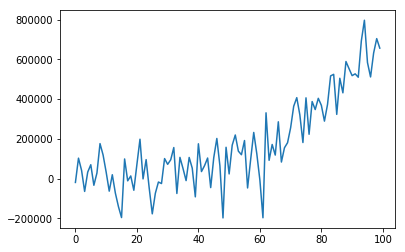

In [46]:
x_test, y_test = gen_data_set(size=100, mu=mu, sigma=sigma)

In [47]:
def p(x_scalar, w):
    # Need to use [0,0] to get actual value b/c we are dealing with
    # np.matrix type
    prediction = sum([x_scalar**m * w[m] for m in range(len(w))])
    if isinstance(prediction,np.matrix):
        return prediction[0,0]
    else:
        return prediction

def ms(x_vec, y, w):
    return .5 * sum([(p(x_vec[i], w) - y[i]) ** 2 for i in range(len(x_vec))])

def rmse(x_vec, y, w):
    if(len(w) == 0 or len(x_vec) == 0 or len(y) == 0):
        return np.inf
    # Need to use [0,0] b/c we are dealing with a matrix
    return np.sqrt(2/len(x_vec) * ms(x_vec, y, w))

### We can do this a better way by making a numpy predictions array and taking advantage of numpy's vectorization/broadcasting

In [48]:
def rmse_better(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

# Plot the RMS on training and test as a function of $m$. You should then be able to see the optimal value of m for fitting your data; the optimal choice will have a small error, small $\text{model complexity}$ (low degree), and decent $ \text{generalization} $ (low test error)

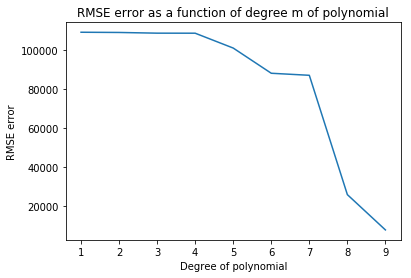

In [49]:
# In order to make RMSE a function of m (the degree of polynomial), we will make weights for 
# the degrees we wish to remove 0

rmses = []
for degree in range(0, len(x_train)):
    rmses.append(rmse(x_train, y_train, 
                      get_weights(x_train, y_train, degree)))

plt.plot(rmses)
plt.title('RMSE error as a function of degree m of polynomial')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE error')
plt.show()

### We expecte that the RMSE for the training data will continually go down because it is getting closer and closer to the actually data with higher d, but with training data we should see RMSE go down then back up. In case of the true function being a 3 degree polynomial, it takes a lot of noise (sample from normal distribution with mean 0 and sd ~ 99999) to see this happen 

/home/daniel/mlenv/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars


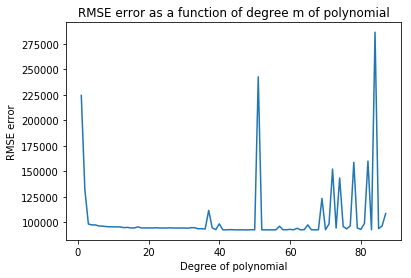

In [50]:
# In order to make RMSE a function of m (the degree of polynomial), we will make weights for 
# the degrees we wish to remove 0

rmses = []
for degree in range(0, len(x_test) - 1):
    rmses.append(rmse(x_test, y_test, 
                      get_weights(x_test, y_test, degree)))

plt.plot(rmses)
plt.title('RMSE error as a function of degree m of polynomial')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE error')
plt.show()

# Based on the chart, the best tradeoff b/w simplicity and minimal error is picking a 3rd degree polynomial. Let's see it's exact error and plot it with the training data

In [51]:
optimal_degree = 3
print('RMSE for optimal degree polynomial on training data:', 
      rmse(x_train, y_train, 
           get_weights(x_train, y_train, optimal_degree)))

RMSE for optimal degree polynomial on training data: 108693.058733


In [52]:
def plot_with_degree(x_train, y_train, degree, lamb=-1, xlabel='', ylabel='', title=''):
    w_star = get_weights(x_train, y_train, degree, lamb)
    predictions = [p(x_train[i], w_star) for i in range(len(x_train))]
    plt.plot(predictions, 'b', label='predictions')
    plt.plot(y_train, 'rs', label='targets')
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

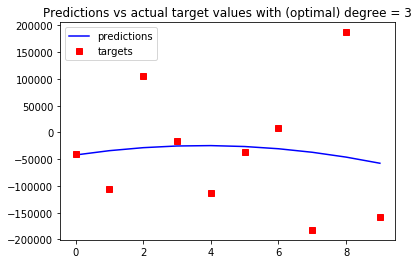

In [53]:
plot_with_degree(x_train, y_train, optimal_degree, 
                 title='Predictions vs actual target values with (optimal) degree = ' + str(optimal_degree))

# Let's see the RMSE we get for the optimal degree polynomial $(m = 3$) on the test data and plot the resulting polynomial against the actual data

In [54]:
print('RMSE for optimal degree polynomial on test data:', 
      round(rmse(x_test, y_test, 
           get_weights(x_test, y_test, optimal_degree)),2))

RMSE for optimal degree polynomial on test data: 98454.05


Doesn't seem like that bad of error. The error for the training data was ~0.25. We would expect that the error on the test data would be a bit larger than the training data. Not sure if 3x the error would be considered too much of a difference

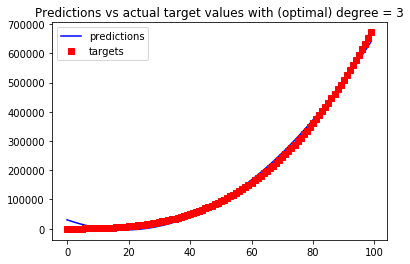

In [13]:
plot_with_degree(x_test, y_test, optimal_degree, 
                 title='Predictions vs actual target values with (optimal) degree = ' + str(optimal_degree))

We seem to generalize well for the test data (this is unsurprising since I used a polynomial to generate the training/test data)

# Regularized version

In [14]:
#m_vals = np.linspace(1,10, 10).astype(np.int)
m_vals = [3, 5, 9]
lambdas = [0, 100, 1000]

## Training set

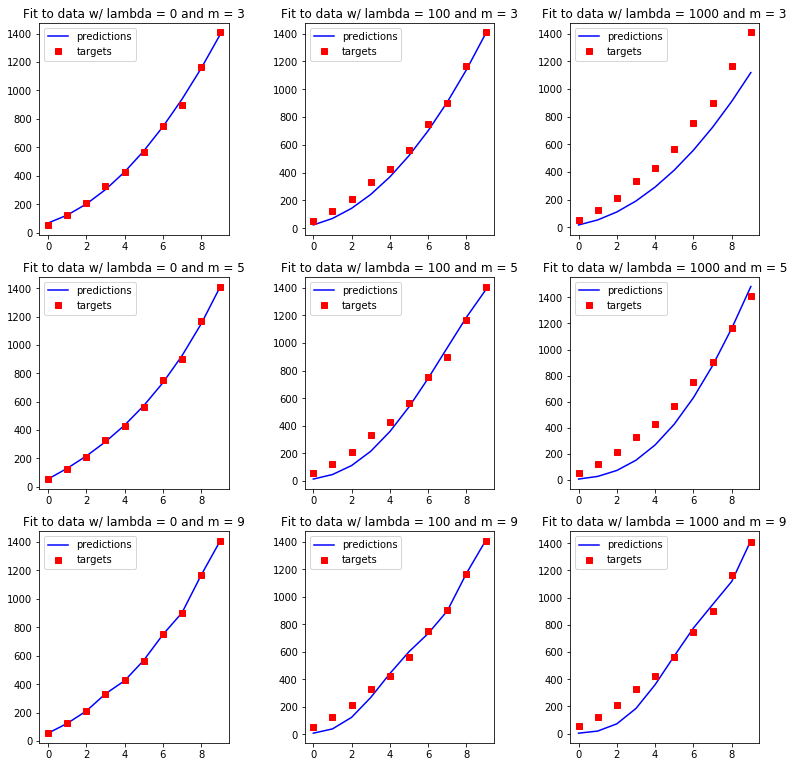

In [15]:
f, axes = plt.subplots(len(m_vals), len(lambdas), figsize=(10,10))
for r in range(len(m_vals)):
    for c in range(len(lambdas)):
        w_star = get_weights(x_train, y_train, m_vals[r], lambdas[c])
        predictions = [p(x_train[i], w_star) for i in range(len(x_train))]
        axes[r][c].set_title('Fit to data w/ lambda = ' + str(lambdas[c]) + ' and m = ' + str(m_vals[r]))
        axes[r][c].plot(predictions, 'b', label='predictions')
        axes[r][c].plot(y_train, 'rs', label='targets')
        axes[r][c].legend()
        
plt.subplots_adjust(left=0, bottom=0, right=1, top=1,
                wspace=0.4, hspace=0.2)
plt.show()


### RMSEs for training set

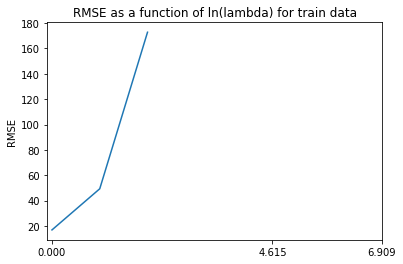

In [16]:
# Plot RMSE as function of ln(lambda)
plt.plot([rmse(x_train, y_train, get_weights(x_train, y_train, optimal_degree, lamb)) for lamb in lambdas])
plt.xticks(np.log1p(lambdas))
plt.title('RMSE as a function of ln(lambda) for train data')
plt.ylabel('RMSE')
plt.show()

Apparently RMSE is increasing as we increase the value of lambda

## Test set

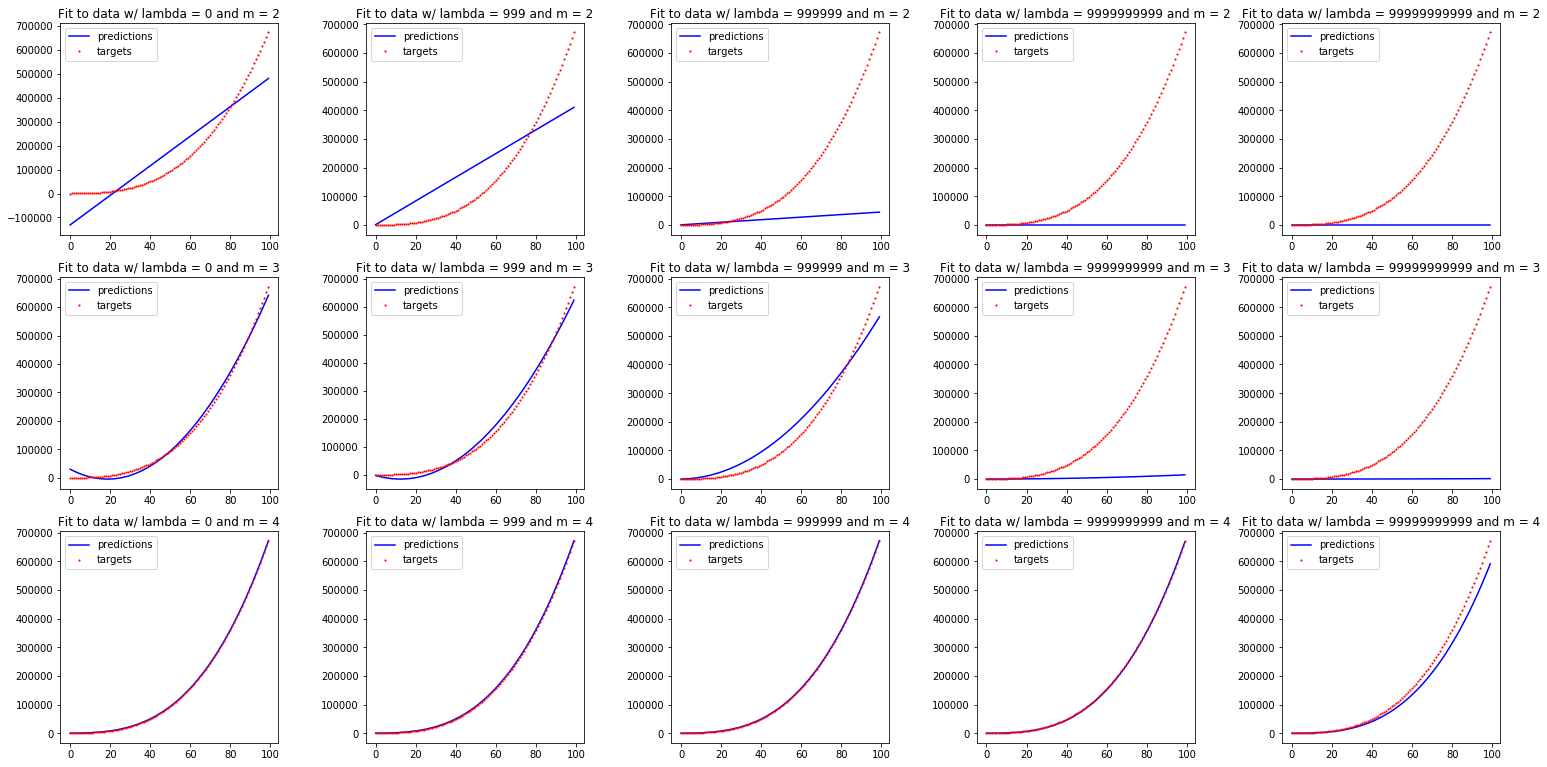

In [17]:
m_vals = [2, 3, 4]
lambdas = [0, 999, 999999, 9999999999, 99999999999]

f, axes = plt.subplots(len(m_vals), len(lambdas), figsize=(10,10))
for r in range(len(m_vals)):
    for c in range(len(lambdas)):
        w_star = get_weights(x_test, y_test, m_vals[r], lambdas[c])
        predictions = [p(x_test[i], w_star) for i in range(len(x_test))]
        axes[r][c].set_title('Fit to data w/ lambda = ' + str(lambdas[c]) + ' and m = ' + str(m_vals[r]))
        axes[r][c].plot(predictions, 'b', label='predictions')
        axes[r][c].plot(y_test, 'rs', label='targets', markersize=1)
        axes[r][c].legend()
        
plt.subplots_adjust(left=0, bottom=0, right=2, top=1,
                wspace=.4, hspace=0.2)
plt.show()

### RMSEs for test set 

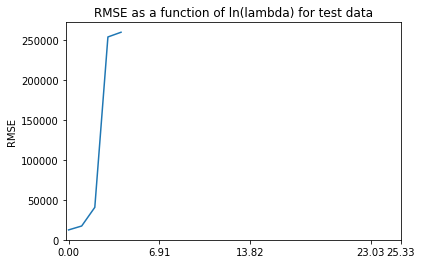

In [18]:
# Plot RMSE as function of ln(lambda)
plt.plot([rmse(x_test, y_test, get_weights(x_test, y_test, optimal_degree, lamb)) for lamb in lambdas])
plt.xticks(np.log1p(lambdas))
plt.title('RMSE as a function of ln(lambda) for test data')
plt.ylabel('RMSE')
plt.show()

Same result as for the training set except that error is increasing more 